In [1]:
import os
import numpy as np


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.covariance import EllipticEnvelope
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from application.cslib import fetch_ts, engineer_features

In [2]:
data_dir = os.path.join("data","cs-train")

ts_all = fetch_ts(data_dir,clean=False)

... loading ts data from files


In [3]:
X,y,dates = engineer_features(ts_all['all'])
        
## Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

In [4]:
pipe_lr = Pipeline([('scaling', StandardScaler()),('regr',LinearRegression())])
pipe_lr.fit(X_train, y_train)
                           
y_pred_base = pipe_lr.predict(X)

In [5]:
param_grid_rf = {
    'rf__criterion': ['mse','mae'],
    'rf__n_estimators': [10,15,20,25,50,100]
    }

pipe_rf = Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestRegressor())])

grid = GridSearchCV(pipe_rf, param_grid=param_grid_rf, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
y_pred = grid.predict(X)

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


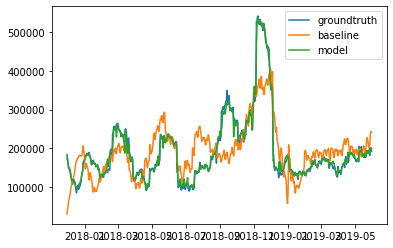

In [7]:
plt.plot(dates, y,label="groundtruth") 
plt.plot(dates, y_pred_base,label="baseline") 
plt.plot(dates, y_pred,label="model") 
plt.legend()
plt.show()